<a href="https://colab.research.google.com/github/cardonasebastian/MNA_PROYECTO/blob/main/Avance1/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTITUTO TECNOLÓGICO DE ESTUDIOS SUPERIORES DE MONTERREY

# Maestría en Inteligencia Artificial Aplicada

# TC5035.10 Proyecto Integrador:

# Optimización Estratégica de la Seguridad Vial: Implementación de un Modelo de Clasificación Avanzado para la Evaluación y Mejora de Hábitos de Conducción


#Fase 1.
# Avance 1. Análisis exploratorio de datos

#A01687530 - Fernando Sebastian Sanchez Cardona
#A01793670 - Bryan Alvarado Cruz
# A01793832 - Fernando Anaya Delgado

# EDA

## Consumir API de Geotab para obtener los consumos de disel de los camiones

In [ ]:
import pandas as pd
import requests
import json


valor_booleano = True

# URL de la API
URL = 'https://attcflotilla686.geotab.com/apiv1/'


# Datos que deseas enviar en el cuerpo de la solicitud POST
data = {
    "method": "Get",
    "params": {
        "typeName": "FuelUsed",
        "search": {
            "groups": [
                {
                    "id": "GroupCompanyId"
                }
            ],
            "fromDate": "2024-05-26T00:00:00.000Z",
            "toDate": "2024-05-26T23:59:59.000Z"
        },
        "sort": {
            "sortBy": "date",
            "sortDirection": "Asc"
        },
        "credentials": credentials
    }
}

# Hacer la solicitud POST para el consumo
data_response_fuel_used = requests.post(URL, json=data)

# Parse the JSON data
json_consumo = data_response_fuel_used.json()
result_dict = json_consumo["result"]

# Create the DataFrame from the parsed JSON data
df_consumo = pd.DataFrame(result_dict)

df_consumo

,device,totalFuelUsed,dateTime,confidence,version,id
0,{'id': 'b27'},0.295593,2024-05-26T23:46:48.000Z,None,0000000000954fff,aw0EjRmPybE2nUiCkH0atSA
1,{'id': 'b27'},2.388364,2024-05-26T16:26:48.000Z,None,0000000000954ff3,abwDWBQnFuUGD8ycHsxSiwA
2,{'id': 'b27'},0.247184,2024-05-26T16:16:11.000Z,None,0000000000954d03,aphQS3HYvSUu7iFB5xjNATg
3,{'id': 'b27'},0.250702,2024-05-26T06:49:57.000Z,None,0000000000954cf2,aETdr_3l6fUa8MqcBH09NkQ
4,{'id': 'b27'},1.194848,2024-05-26T02:43:21.000Z,None,00000000009549f4,aO7UE_aA-5UWzayp0VnYD7w
...,...,...,...,...,...,...
2127,{'id': 'b12E'},12.772535,2024-05-26T10:37:31.000Z,None,0000000000954ad0,aMc3opKSmP0e0sK9OtHjDFA
2128,{'id': 'b12E'},0.026770,2024-05-26T09:48:37.000Z,None,0000000000954ab5,aouts8T230USsSmFADBqIHA
2129,{'id': 'b12E'},0.908329,2024-05-26T03:15:22.000Z,None,0000000000954ab2,aiSblrr_QAkWiiM_scGlwig
2130,{'id': 'b12E'},0.200552,2024-05-26T03:06:29.000Z,None,00000000009548cb,a1GgjwKaqR0Cmowb2W2Vk2A


### Agregar fecha actual al DataFrame

In [ ]:
date = pd.to_datetime('today').normalize()

df_consumo['date'] = date

df_consumo

,device,totalFuelUsed,dateTime,confidence,version,id,date
0,{'id': 'b27'},0.295593,2024-05-26T23:46:48.000Z,None,0000000000954fff,aw0EjRmPybE2nUiCkH0atSA,2024-05-27
1,{'id': 'b27'},2.388364,2024-05-26T16:26:48.000Z,None,0000000000954ff3,abwDWBQnFuUGD8ycHsxSiwA,2024-05-27
2,{'id': 'b27'},0.247184,2024-05-26T16:16:11.000Z,None,0000000000954d03,aphQS3HYvSUu7iFB5xjNATg,2024-05-27
3,{'id': 'b27'},0.250702,2024-05-26T06:49:57.000Z,None,0000000000954cf2,aETdr_3l6fUa8MqcBH09NkQ,2024-05-27
4,{'id': 'b27'},1.194848,2024-05-26T02:43:21.000Z,None,00000000009549f4,aO7UE_aA-5UWzayp0VnYD7w,2024-05-27
...,...,...,...,...,...,...,...
2127,{'id': 'b12E'},12.772535,2024-05-26T10:37:31.000Z,None,0000000000954ad0,aMc3opKSmP0e0sK9OtHjDFA,2024-05-27
2128,{'id': 'b12E'},0.026770,2024-05-26T09:48:37.000Z,None,0000000000954ab5,aouts8T230USsSmFADBqIHA,2024-05-27
2129,{'id': 'b12E'},0.908329,2024-05-26T03:15:22.000Z,None,0000000000954ab2,aiSblrr_QAkWiiM_scGlwig,2024-05-27
2130,{'id': 'b12E'},0.200552,2024-05-26T03:06:29.000Z,None,00000000009548cb,a1GgjwKaqR0Cmowb2W2Vk2A,2024-05-27


### Guardar el DataFrame en Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ruta_archivo = '/content/drive/My Drive/MNA_PI/consumo_raw.csv'
df_consumo.to_csv(ruta_archivo, index=False)

## Consumir API de Geotab para obtener del viaje del camion

In [ ]:
import pandas as pd
import requests
import json


valor_booleano = True

# URL de la API
URL = 'https://attcflotilla686.geotab.com/apiv1/'


# Datos que deseas enviar en el cuerpo de la solicitud POST
data = {
    "method": "Get",
    "params": {
        "typeName": "Trip",
        "search": {
            "groups": [
                {
                    "id": "GroupCompanyId"
                }
            ],
            "fromDate": "2024-05-26T00:00:00.000Z",
            "toDate": "2024-05-26T23:59:59.000Z"
        },
        "sort": {
            "sortBy": "date",
            "sortDirection": "Asc"
        },
        "credentials": credentials
    }
}

# Hacer la solicitud POST para el consumo
data_response_trip = requests.post(URL, json=data)

# Parse the JSON data
json_trip = data_response_trip.json()
result_dict_trip = json_trip["result"]

# Create the DataFrame from the parsed JSON data
df_trip = pd.DataFrame(result_dict_trip)

df_trip

,afterHoursDistance,afterHoursDrivingDuration,afterHoursEnd,afterHoursStart,afterHoursStopDuration,averageSpeed,distance,drivingDuration,engineHours,idlingDuration,...,start,stop,stopDuration,stopPoint,workDistance,workDrivingDuration,workStopDuration,device,driver,id
0,0.000139,00:00:01,True,True,00:19:11,0.500000,0.000139,00:00:01,2.914200e+06,00:07:50,...,2024-05-26T00:00:27.000Z,2024-05-26T00:00:28.000Z,00:19:11,"{'x': -100.25431060791016, 'y': 20.57674217224...",0,00:00:00,00:00:00,{'id': 'bF9'},UnknownDriverId,b51BDC76
1,0.082976,00:01:26.9370000,True,True,00:25:24.0630000,3.435972,0.082976,00:01:26.9370000,1.352844e+07,00:00:04,...,2024-05-25T23:59:52.063Z,2024-05-26T00:01:19.000Z,00:25:24.0630000,"{'x': -100.25428771972656, 'y': 25.87064361572...",0,00:00:00,00:00:00,{'id': 'bA5'},"{'id': 'b95', 'isDriver': True}",b51BE450
2,0.016534,00:00:23,True,True,00:00:39.0630000,2.587896,0.016534,00:00:23,2.105462e+06,00:00:21,...,2024-05-26T00:01:56.000Z,2024-05-26T00:02:19.000Z,00:00:39.0630000,"{'x': -99.5672836303711, 'y': 27.46670150756836}",0,00:00:00,00:00:00,{'id': 'b10F'},UnknownDriverId,b51BD0F2
3,177.590710,02:23:47.9370000,True,True,00:22:11,74.099590,177.590710,02:23:47.9370000,7.681680e+06,00:14:08,...,2024-05-25T21:38:33.063Z,2024-05-26T00:02:21.000Z,00:22:11,"{'x': -100.2546157836914, 'y': 25.871002197265...",0,00:00:00,00:00:00,{'id': 'bC4'},UnknownDriverId,b51BE03F
4,0.106728,00:01:18.9370000,True,True,00:14:46.0630000,4.867437,0.106728,00:01:18.9370000,1.480968e+07,00:00:05,...,2024-05-26T00:01:07.063Z,2024-05-26T00:02:26.000Z,00:14:46.0630000,"{'x': -100.25487518310547, 'y': 25.87102699279...",0,00:00:00,00:00:00,{'id': 'b71'},"{'id': 'bBD', 'isDriver': True}",b51BD9BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,0.053203,00:02:27,True,True,00:06:50,1.302942,0.053203,00:02:27,1.413172e+07,00:06:50,...,2024-05-26T23:55:17.000Z,2024-05-26T23:57:44.000Z,00:06:50,"{'x': -100.25444030761719, 'y': 20.57722854614...",0,00:00:00,00:00:00,{'id': 'bBF'},"{'id': 'b24B', 'isDriver': True}",b51EFF57
2164,1.811011,00:06:29,True,True,00:06:47,16.759995,1.811011,00:06:29,5.813981e+06,00:06:47,...,2024-05-26T23:53:05.000Z,2024-05-26T23:59:34.000Z,00:06:47,"{'x': -99.56751251220703, 'y': 27.46631622314453}",0,00:00:00,00:00:00,{'id': 'bEF'},"{'id': 'bE3', 'isDriver': True}",b51F005A
2165,133.623320,02:00:06.9370000,True,True,00:08:54.0630000,66.747350,133.623320,02:00:06.9370000,7.360920e+06,00:00:08,...,2024-05-26T21:59:27.063Z,2024-05-26T23:59:34.000Z,00:08:54.0630000,"{'x': -100.72309875488281, 'y': 25.16887092590...",0,00:00:00,00:00:00,{'id': 'bC5'},UnknownDriverId,b51F0251
2166,202.349120,02:43:13.9370000,True,True,00:06:05,74.378350,202.349120,02:43:13.9370000,9.666799e+06,00:06:05,...,2024-05-26T21:16:27.063Z,2024-05-26T23:59:41.000Z,00:06:05,"{'x': -100.25466918945312, 'y': 25.87100219726...",0,00:00:00,00:00:00,{'id': 'b9D'},UnknownDriverId,b51F00C4


### Agregar fecha actual al DataFrame

In [ ]:
date = pd.to_datetime('today').normalize()

df_trip['date'] = date

df_trip

,afterHoursDistance,afterHoursDrivingDuration,afterHoursEnd,afterHoursStart,afterHoursStopDuration,averageSpeed,distance,drivingDuration,engineHours,idlingDuration,...,stop,stopDuration,stopPoint,workDistance,workDrivingDuration,workStopDuration,device,driver,id,date
0,0.000139,00:00:01,True,True,00:19:11,0.500000,0.000139,00:00:01,2.914200e+06,00:07:50,...,2024-05-26T00:00:28.000Z,00:19:11,"{'x': -100.25431060791016, 'y': 20.57674217224...",0,00:00:00,00:00:00,{'id': 'bF9'},UnknownDriverId,b51BDC76,2024-05-27
1,0.082976,00:01:26.9370000,True,True,00:25:24.0630000,3.435972,0.082976,00:01:26.9370000,1.352844e+07,00:00:04,...,2024-05-26T00:01:19.000Z,00:25:24.0630000,"{'x': -100.25428771972656, 'y': 25.87064361572...",0,00:00:00,00:00:00,{'id': 'bA5'},"{'id': 'b95', 'isDriver': True}",b51BE450,2024-05-27
2,0.016534,00:00:23,True,True,00:00:39.0630000,2.587896,0.016534,00:00:23,2.105462e+06,00:00:21,...,2024-05-26T00:02:19.000Z,00:00:39.0630000,"{'x': -99.5672836303711, 'y': 27.46670150756836}",0,00:00:00,00:00:00,{'id': 'b10F'},UnknownDriverId,b51BD0F2,2024-05-27
3,177.590710,02:23:47.9370000,True,True,00:22:11,74.099590,177.590710,02:23:47.9370000,7.681680e+06,00:14:08,...,2024-05-26T00:02:21.000Z,00:22:11,"{'x': -100.2546157836914, 'y': 25.871002197265...",0,00:00:00,00:00:00,{'id': 'bC4'},UnknownDriverId,b51BE03F,2024-05-27
4,0.106728,00:01:18.9370000,True,True,00:14:46.0630000,4.867437,0.106728,00:01:18.9370000,1.480968e+07,00:00:05,...,2024-05-26T00:02:26.000Z,00:14:46.0630000,"{'x': -100.25487518310547, 'y': 25.87102699279...",0,00:00:00,00:00:00,{'id': 'b71'},"{'id': 'bBD', 'isDriver': True}",b51BD9BC,2024-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,0.053203,00:02:27,True,True,00:06:50,1.302942,0.053203,00:02:27,1.413172e+07,00:06:50,...,2024-05-26T23:57:44.000Z,00:06:50,"{'x': -100.25444030761719, 'y': 20.57722854614...",0,00:00:00,00:00:00,{'id': 'bBF'},"{'id': 'b24B', 'isDriver': True}",b51EFF57,2024-05-27
2164,1.811011,00:06:29,True,True,00:06:47,16.759995,1.811011,00:06:29,5.813981e+06,00:06:47,...,2024-05-26T23:59:34.000Z,00:06:47,"{'x': -99.56751251220703, 'y': 27.46631622314453}",0,00:00:00,00:00:00,{'id': 'bEF'},"{'id': 'bE3', 'isDriver': True}",b51F005A,2024-05-27
2165,133.623320,02:00:06.9370000,True,True,00:08:54.0630000,66.747350,133.623320,02:00:06.9370000,7.360920e+06,00:00:08,...,2024-05-26T23:59:34.000Z,00:08:54.0630000,"{'x': -100.72309875488281, 'y': 25.16887092590...",0,00:00:00,00:00:00,{'id': 'bC5'},UnknownDriverId,b51F0251,2024-05-27
2166,202.349120,02:43:13.9370000,True,True,00:06:05,74.378350,202.349120,02:43:13.9370000,9.666799e+06,00:06:05,...,2024-05-26T23:59:41.000Z,00:06:05,"{'x': -100.25466918945312, 'y': 25.87100219726...",0,00:00:00,00:00:00,{'id': 'b9D'},UnknownDriverId,b51F00C4,2024-05-27


### Guardar el DataFrame en Google Drive

In [ ]:
ruta_archivo = '/content/drive/My Drive/MNA_PI/trip_raw.csv'
df_trip.to_csv(ruta_archivo, index=False)

# Datos del estado inactivo del camion (Cuanto tiempo se queda parado)

In [ ]:
import requests
import json
from datetime import datetime

# URL de la API
URL = 'https://attcflotilla686.geotab.com/apiv1'


# Datos que deseas enviar en el cuerpo de la solicitud POST
data = {
    "method": "GetReportData",
    "params": {
        "argument": {
            "fromUtc": "2024-05-26T00:00:00.000Z",
            "toUtc": "2024-05-26T23:59:59.000Z",
            "reportArgumentType": "DeviceActivitySummary",
            "reportSubGroup": "None",
            "minCustomerStopDuration": "00:00:00.000",
            "groupLevel": -1,
            "groups": [
                {
                    "id": "GroupCompanyId"
                }
            ],
            "devices": [],
            "includeZeroDistanceTrips": False,
            "includeHistoricData": True
        },
        "credentials": credentials
    }
}

# Hacer la solicitud POST para el consumo
data_response_idling = requests.post(URL, json=data)

# Parse the JSON data
json_idling = data_response_idling.json()
result_dict_idling = json_idling["result"]

# Create the DataFrame from the parsed JSON data
df_idling = pd.DataFrame(result_dict_idling)

df_idling

,customerDuration,customerDurationOverPercent,customerStopsCount,stopCount,distance,drivingDuration,drivingDurationPercent,entity,groupName,homeDuration,...,name,nonCustomerDuration,nonCustomerDurationPercent,officeDuration,officeDurationPercent,periodEndDate,periodNumber,periodStartDate,stopDuration,restrictedDataModeDistance
0,00:09:44,1,2,12,201.876170,05:18:09.9370000,22,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:09:44,...,1025,18:32:05.0630000,77,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:41:49.0630000,0
1,00:13:14,1,2,17,198.465670,05:36:02.8740000,23,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, TRANSFER",00:13:14,...,1026,18:10:42.1260000,76,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:23:56.1260000,0
2,00:16:37.2520000,1,4,10,191.261300,04:22:01.6220000,18,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:16:37.2520000,...,1028,19:21:20.1260000,81,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:37:57.3780000,0
3,00:20:01,1,4,9,202.826140,04:51:40.9370000,20,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, FEMA, LG, TRANSFER",00:20:01,...,1029,18:48:17.0630000,78,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:08:18.0630000,0
4,00:15:00.0630000,1,2,4,96.517260,02:13:27.8740000,9,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, LG, TRANSFER",00:15:00.0630000,...,1033,21:31:31.0630000,90,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,21:46:31.1260000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,00:48:50,3,6,19,670.613650,09:42:43.6840000,40,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ, CU...",00:00:00,...,P08,13:28:25.3160000,56,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,14:17:15.3160000,0
148,00:00:00,0,0,11,975.018800,13:50:16.8740000,58,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, Inktransport, MONDELEZ",00:00:00,...,P15,10:09:42.1260000,42,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,10:09:42.1260000,0
149,00:00:00,0,0,19,115.567240,03:06:02.9260000,13,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,P22,20:53:56.0740000,87,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,20:53:56.0740000,0
150,00:00:00,0,0,4,1.348972,00:14:35,1,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,P25,23:45:24,99,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,23:45:24,0


### Agregar la fecha actual al DataFrame

In [ ]:
date = pd.to_datetime('today').normalize()

df_idling['date'] = date

df_idling

,customerDuration,customerDurationOverPercent,customerStopsCount,stopCount,distance,drivingDuration,drivingDurationPercent,entity,groupName,homeDuration,...,nonCustomerDuration,nonCustomerDurationPercent,officeDuration,officeDurationPercent,periodEndDate,periodNumber,periodStartDate,stopDuration,restrictedDataModeDistance,date
0,00:09:44,1,2,12,201.876170,05:18:09.9370000,22,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:09:44,...,18:32:05.0630000,77,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:41:49.0630000,0,2024-05-27
1,00:13:14,1,2,17,198.465670,05:36:02.8740000,23,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, TRANSFER",00:13:14,...,18:10:42.1260000,76,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:23:56.1260000,0,2024-05-27
2,00:16:37.2520000,1,4,10,191.261300,04:22:01.6220000,18,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:16:37.2520000,...,19:21:20.1260000,81,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:37:57.3780000,0,2024-05-27
3,00:20:01,1,4,9,202.826140,04:51:40.9370000,20,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, FEMA, LG, TRANSFER",00:20:01,...,18:48:17.0630000,78,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:08:18.0630000,0,2024-05-27
4,00:15:00.0630000,1,2,4,96.517260,02:13:27.8740000,9,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, LG, TRANSFER",00:15:00.0630000,...,21:31:31.0630000,90,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,21:46:31.1260000,0,2024-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,00:48:50,3,6,19,670.613650,09:42:43.6840000,40,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ, CU...",00:00:00,...,13:28:25.3160000,56,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,14:17:15.3160000,0,2024-05-27
148,00:00:00,0,0,11,975.018800,13:50:16.8740000,58,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, Inktransport, MONDELEZ",00:00:00,...,10:09:42.1260000,42,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,10:09:42.1260000,0,2024-05-27
149,00:00:00,0,0,19,115.567240,03:06:02.9260000,13,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,20:53:56.0740000,87,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,20:53:56.0740000,0,2024-05-27
150,00:00:00,0,0,4,1.348972,00:14:35,1,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,23:45:24,99,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,23:45:24,0,2024-05-27


### Guardar el DataFrame en Google Drive



In [ ]:
ruta_archivo = '/content/drive/My Drive/MNA_PI/idling_raw.csv'
df_idling.to_csv(ruta_archivo, index=False)

# Datos de seguridad del camion (Giro bruscos, Cinturon , Aceleracion)

In [ ]:
# URL de la API
URL = 'https://attcflotilla686.geotab.com/apiv1'


request = {
    "method": "Authenticate",
    "params": {
        "database": "forza_nafta_services",
        "userName": "arincon@forzatrans.com",
        "password": ""
    }
}

response = requests.post(URL, json=request)

json_response = response.json()

credentials = json_response['result']['credentials']

In [ ]:
import requests
import json

valor_booleano = True

# URL de la API
URL = 'https://attcflotilla686.geotab.com/apiv1'


# Datos que deseas enviar en el cuerpo de la solicitud POST
data = {
    "method": "GetReportData",
    "params": {
        "argument": {
    "runGroupLevel": -1,
    "isNoDrivingActivityHidden": False,
    "fromUtc": "2024-05-01T00:00:00.000Z",
    "toUtc": "2024-05-01T23:59:59.000Z",
    "entityType": "Device",
    "reportArgumentType": "RiskManagement",
    "groups": [
        {
            "id": "GroupCompanyId"
        }
    ],
    "reportSubGroup": "None",
    "rules": [
        {
            "id": "RuleSeatbeltId"
        },
        {
            "id": "RuleHarshCorneringId"
        },
        {
            "id": "RuleHarshBrakingId"
        },
        {
            "id": "RuleJackrabbitStartsId"
        },
        {
            "id": "RulePostedSpeedingId"
        },
        {
            "id": "aFv2P3WBmGkqJTomxyC6-Dw"
        }
    ],
    "includeDismissedEvents": False
},
        "credentials": credentials
    }
}

# Hacer la solicitud POST para el consumo
data_response_safety = requests.post(URL, json=data)

# Parse the JSON data
json_safety = data_response_safety.json()
result_dict_safety = json_safety["result"]

# Create the DataFrame from the parsed JSON data
df_safety = pd.DataFrame(result_dict_safety)

df_safety

,customerDuration,customerDurationOverPercent,customerStopsCount,stopCount,distance,drivingDuration,drivingDurationPercent,entity,groupName,homeDuration,...,name,nonCustomerDuration,nonCustomerDurationPercent,officeDuration,officeDurationPercent,periodEndDate,periodNumber,periodStartDate,stopDuration,restrictedDataModeDistance
0,00:09:44,1,2,12,201.876170,05:18:09.9370000,22,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:09:44,...,1025,18:32:05.0630000,77,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:41:49.0630000,0
1,00:13:14,1,2,17,198.465670,05:36:02.8740000,23,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, TRANSFER",00:13:14,...,1026,18:10:42.1260000,76,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:23:56.1260000,0
2,00:16:37.2520000,1,4,10,191.261300,04:22:01.6220000,18,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:16:37.2520000,...,1028,19:21:20.1260000,81,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:37:57.3780000,0
3,00:20:01,1,4,9,202.826140,04:51:40.9370000,20,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, FEMA, LG, TRANSFER",00:20:01,...,1029,18:48:17.0630000,78,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:08:18.0630000,0
4,00:15:00.0630000,1,2,4,96.517260,02:13:27.8740000,9,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, LG, TRANSFER",00:15:00.0630000,...,1033,21:31:31.0630000,90,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,21:46:31.1260000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,00:48:50,3,6,19,670.613650,09:42:43.6840000,40,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ, CU...",00:00:00,...,P08,13:28:25.3160000,56,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,14:17:15.3160000,0
148,00:00:00,0,0,11,975.018800,13:50:16.8740000,58,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, Inktransport, MONDELEZ",00:00:00,...,P15,10:09:42.1260000,42,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,10:09:42.1260000,0
149,00:00:00,0,0,19,115.567240,03:06:02.9260000,13,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,P22,20:53:56.0740000,87,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,20:53:56.0740000,0
150,00:00:00,0,0,4,1.348972,00:14:35,1,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,P25,23:45:24,99,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,23:45:24,0


### Agregar la fecha actual al DataFrame

In [ ]:
date = pd.to_datetime('today').normalize()

df_safety['date'] = date

df_safety

,customerDuration,customerDurationOverPercent,customerStopsCount,stopCount,distance,drivingDuration,drivingDurationPercent,entity,groupName,homeDuration,...,nonCustomerDuration,nonCustomerDurationPercent,officeDuration,officeDurationPercent,periodEndDate,periodNumber,periodStartDate,stopDuration,restrictedDataModeDistance,date
0,00:09:44,1,2,12,201.876170,05:18:09.9370000,22,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:09:44,...,18:32:05.0630000,77,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:41:49.0630000,0,2024-05-27
1,00:13:14,1,2,17,198.465670,05:36:02.8740000,23,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, TRANSFER",00:13:14,...,18:10:42.1260000,76,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,18:23:56.1260000,0,2024-05-27
2,00:16:37.2520000,1,4,10,191.261300,04:22:01.6220000,18,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, FEMA, LG, TRANSFER",00:16:37.2520000,...,19:21:20.1260000,81,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:37:57.3780000,0,2024-05-27
3,00:20:01,1,4,9,202.826140,04:51:40.9370000,20,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, FEMA, LG, TRANSFER",00:20:01,...,18:48:17.0630000,78,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,19:08:18.0630000,0,2024-05-27
4,00:15:00.0630000,1,2,4,96.517260,02:13:27.8740000,9,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, LG, TRANSFER",00:15:00.0630000,...,21:31:31.0630000,90,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,21:46:31.1260000,0,2024-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,00:48:50,3,6,19,670.613650,09:42:43.6840000,40,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ, CU...",00:00:00,...,13:28:25.3160000,56,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,14:17:15.3160000,0,2024-05-27
148,00:00:00,0,0,11,975.018800,13:50:16.8740000,58,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, Inktransport, MONDELEZ",00:00:00,...,10:09:42.1260000,42,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,10:09:42.1260000,0,2024-05-27
149,00:00:00,0,0,19,115.567240,03:06:02.9260000,13,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,20:53:56.0740000,87,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,20:53:56.0740000,0,2024-05-27
150,00:00:00,0,0,4,1.348972,00:14:35,1,"{'isContinuousConnectEnabled': False, 'obdAler...","Vehicle, Diesel, OPERACION TRAMO, MONDELEZ",00:00:00,...,23:45:24,99,00:00:00,0,2024-05-26T23:59:59.000Z,1,2024-05-26T00:00:00.000Z,23:45:24,0,2024-05-27


### Guardar el DataFrame en Google Drive

In [ ]:
ruta_archivo = '/content/drive/My Drive/MNA_PI/safety_raw.csv'
df_safety.to_csv(ruta_archivo, index=False)

# 1. Identificar y visualizar valores faltantes

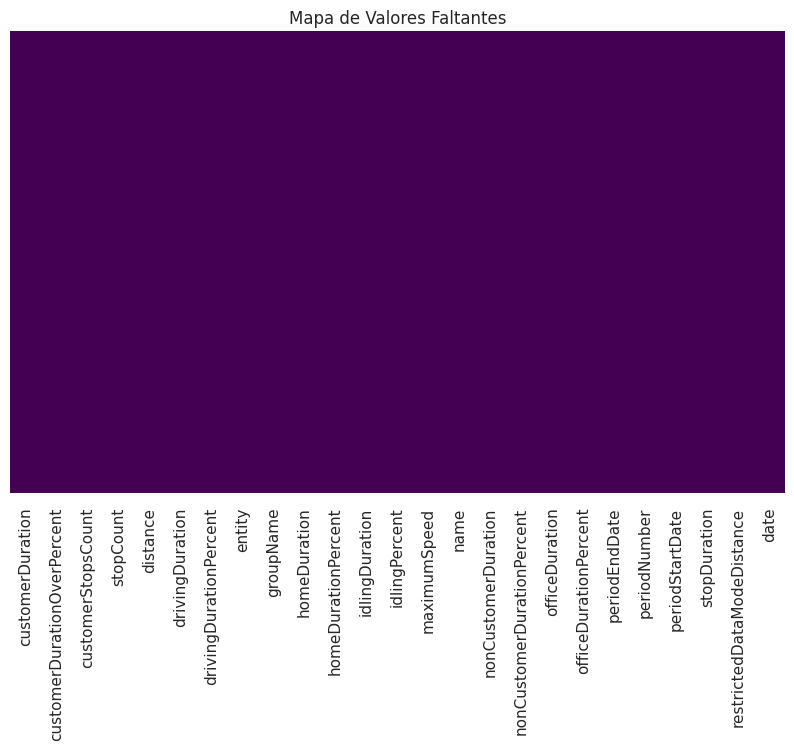

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set(style="whitegrid")

# 1. Identificar y visualizar valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df_idling.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.show()

Se crea un mapa donde cada columna del DataFrame se representa en el eje horizontal y cada fila en el vertical. Las celdas coloreadas indicarían la presencia de valores faltantes. Dado que el dataset es simulado no incluimos valores faltantes, se espera ver un gráfico completamente limpio, sin colores, indicando que no hay valores faltantes.

# 2. Estadísticas resumidas del conjunto de datos

In [ ]:
# 2. Estadísticas resumidas del conjunto de datos
print(df_idling.describe())


       customerDurationOverPercent  customerStopsCount   stopCount  \
count                   152.000000          152.000000  152.000000   
mean                     19.217105            6.105263   14.848684   
min                       0.000000            0.000000    2.000000   
25%                       2.000000            3.000000    9.000000   
50%                       7.000000            5.000000   14.000000   
75%                      24.000000            8.000000   19.000000   
max                      97.000000           42.000000   55.000000   
std                      26.640834            5.460463    7.762842   

          distance  drivingDurationPercent  homeDurationPercent  \
count   152.000000              152.000000           152.000000   
mean    604.373804               35.592105             0.118421   
min       0.022336                0.000000             0.000000   
25%     201.023545               18.000000             0.000000   
50%     660.240925               3

Este bloque de código utiliza df.describe() para mostrar estadísticas resumidas de todas las variables numéricas en el DataFrame. Esto incluye el conteo, media, desviación estándar, mínimo, máximo, y los porcentajes. Esto nos ayudara a entender la distribución general y escala de cada variable numérica.

# 3. Identificación y visualización de valores atípicos

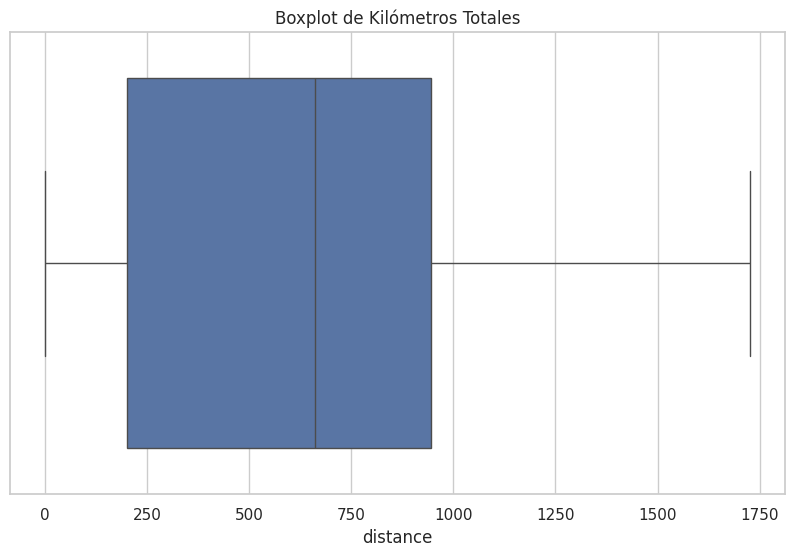

In [ ]:
# 3. Identificación y visualización de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_idling, x='distance')
plt.title('Boxplot de Kilómetros Totales')
plt.show()

Utilizando un boxplot para la columna total_kms, se visualiza la distribución de los kilómetros totales conducidos por los conductores. Los valores atípicos aparecerán como puntos individuales fuera del rango del diagrama, lo que indica que estos puntos están fuera del rango. Esto nos ayuda a identificar datos que son anormalmente altos o bajos.

# 4. Cardinalidad de las variables categóricas

In [ ]:
# 4. Cardinalidad de las variables categóricas
print(df_idling['groupName'].value_counts())

groupName
Vehicle, Diesel, OPERACION TRAMO, MONDELEZ                                                                18
Vehicle, Diesel, OPERACION INTERIOR                                                                       13
Vehicle, Diesel, FEMA, LG, TRANSFER                                                                        8
Vehicle, Diesel, OPERACION INTERIOR, Nestle, Unidades Programadas.                                         7
Vehicle, Diesel, OPERACION INTERIOR, Unidades Programadas.                                                 7
Vehicle, Diesel, OPERACION INTERIOR, Michelin, Nestle                                                      6
Vehicle, Diesel, FLOTA, Unidades Programadas.                                                              6
Vehicle, Diesel, OPERACION INTERIOR, Nestle                                                                6
Vehicle, Diesel, OPERACION TRAMO, MONDELEZ, Unidades Programadas.                                          6
Vehicle, 

Este código cuenta cuántas veces aparece cada clase en la columna driver_class. Esto es útil para entender cuántas categorías distintas hay y cuales diferencias están entre sí. Si una categoría es mucho más frecuente que otra, esto podría influir en la precisión de los modelos de clasificación futuros.

# 5. Distribuciones sesgadas

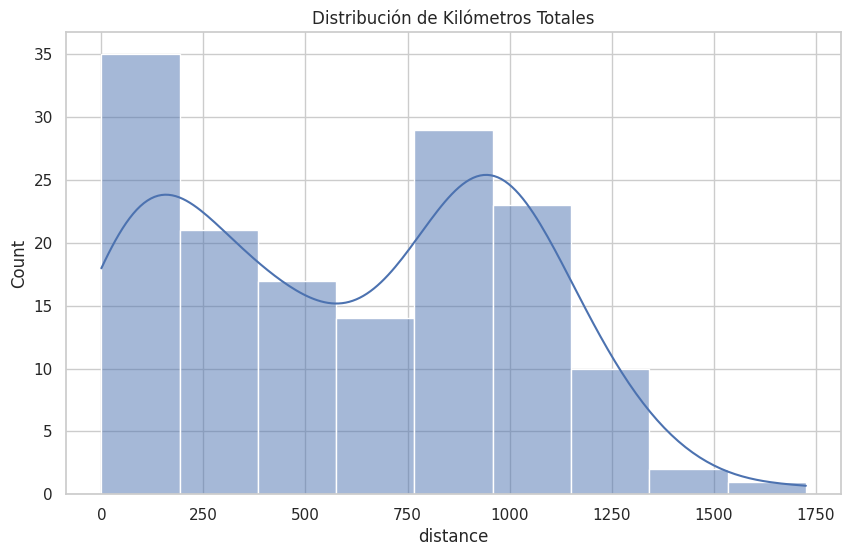

In [ ]:
# 5. Distribuciones sesgadas
plt.figure(figsize=(10, 6))
sns.histplot(df_idling['distance'], kde=True)
plt.title('Distribución de Kilómetros Totales')
plt.show()



# 6. Tendencias temporales

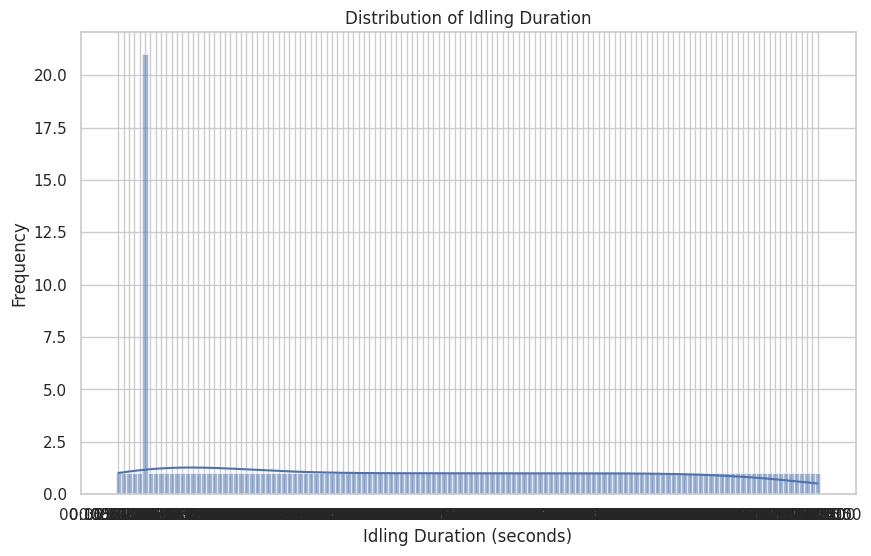

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_idling, x="customerDuration", kde=True)
plt.title("Distribution of Idling Duration")
plt.xlabel("Idling Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

Este grafico crea un histograma de la columna "customerDuration", que muestra la distribución de frecuencia de las duraciones de inactividad.

# 7. Correlación entre variables

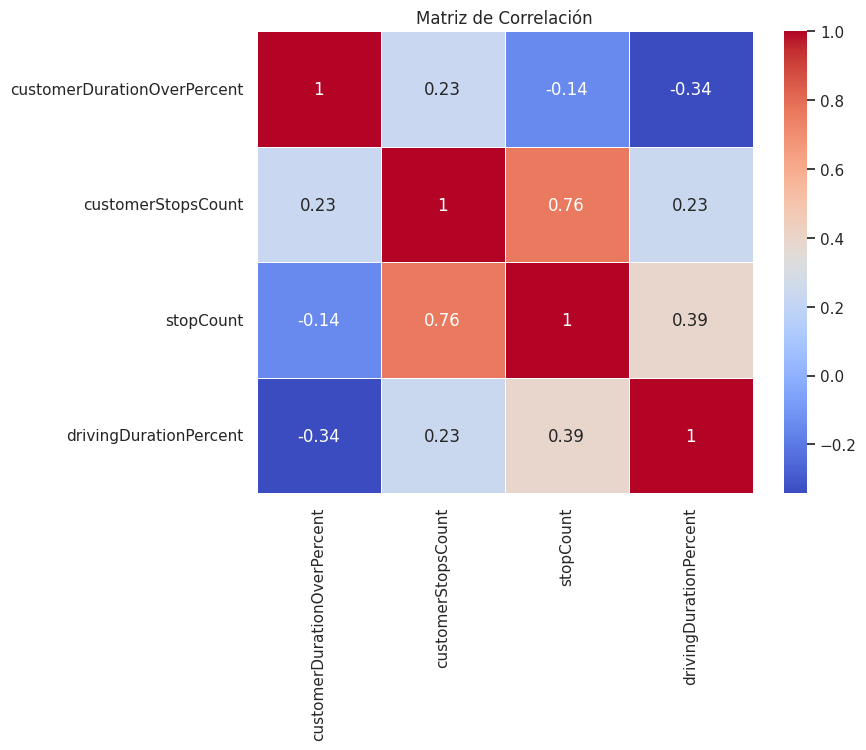

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 7. Correlación entre variables
correlation_matrix = df_idling[['customerDurationOverPercent', 'customerStopsCount', 'stopCount', 'drivingDurationPercent']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()



La matriz de correlación te muestra cómo cada par de variables numéricas seleccionadas está relacionado. Valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente, mientras que valores cercanos a 0 indican poca o ninguna correlación lineal.

# 8. Distribución de datos en función de diferentes categorías

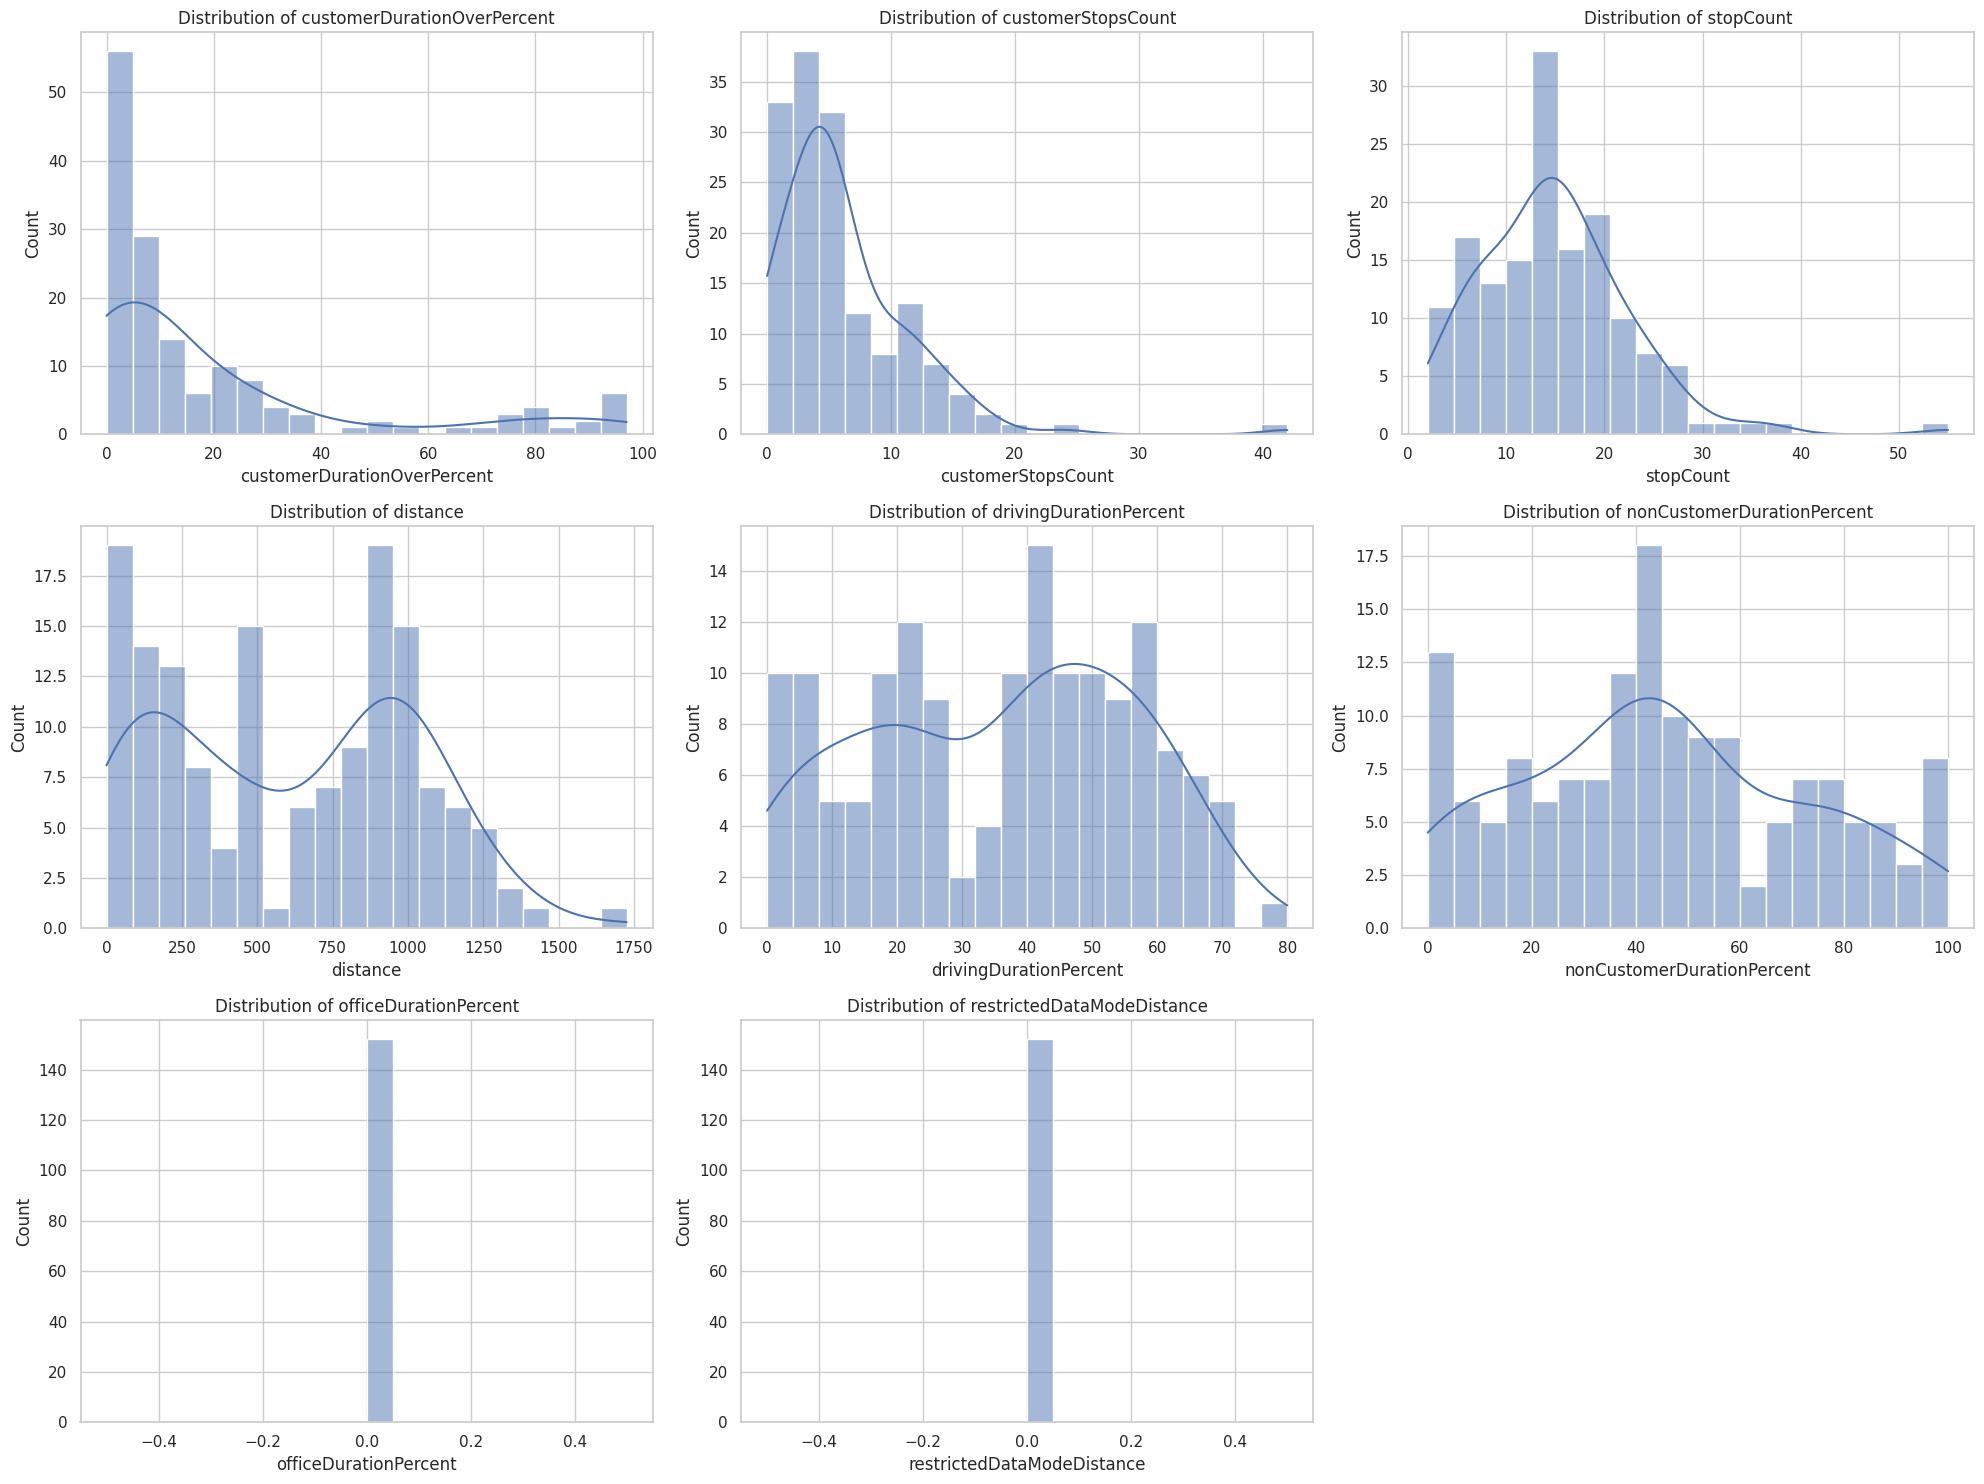

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Definir las categorías a analizar
categories = ['groupName', 'periodNumber', 'date']

# Columnas numéricas
numerical_columns = [
    'customerDurationOverPercent',
    'customerStopsCount',
    'stopCount',
    'distance',
    'drivingDurationPercent',
    'nonCustomerDurationPercent',
    'officeDurationPercent',
    'restrictedDataModeDistance'
]

# Convertir las columnas de duración a segundos para análisis
duration_columns = [
    'customerDuration', 'drivingDuration', 'homeDuration',
    'nonCustomerDuration', 'officeDuration', 'stopDuration'
]

# Función para convertir la duración a segundos
def duration_to_seconds(duration_str):
    if pd.isnull(duration_str):
        return 0
    try:
        h, m, s = map(float, duration_str.split(':'))
        return int(h) * 3600 + int(m) * 60 + s
    except:
        return 0

# Aplicar la conversión a las columnas de duración
for col in duration_columns:
    df_idling[col] = df_idling[col].apply(duration_to_seconds)

# Plots de distribución para columnas numéricas
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_idling[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




# 9. Desequilibrio en las clases de la variable objetivo

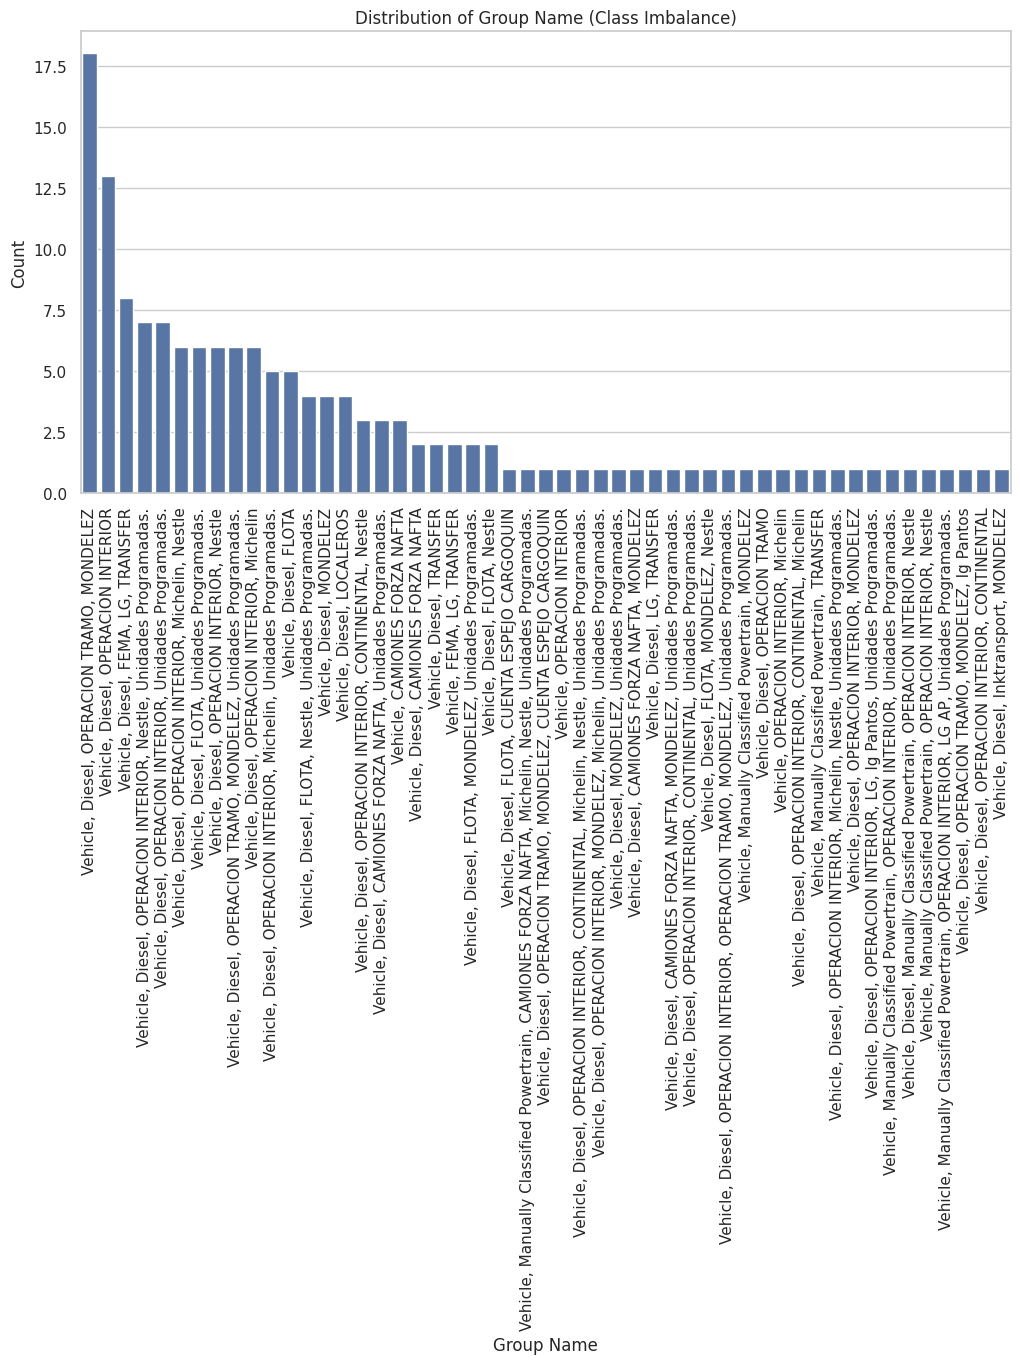

In [ ]:
group_name_distribution = df_idling['groupName'].value_counts()

# Plot the distribution to visualize class imbalance
plt.figure(figsize=(12, 6))
sns.barplot(x=group_name_distribution.index, y=group_name_distribution.values)
plt.title('Distribution of Group Name (Class Imbalance)')
plt.xlabel('Group Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

La distribución de la variable groupName muestra un claro desequilibrio en las clases. Algunas clases tienen muchos más registros que otras.